# Uczenie Maszynowe - ćwiczenia 2

## Pandas

Dziś potrenujemy trochę zarządzanie danych z biblioteką Pandas. Pandas “Python Data Analysis Library” to biblioteka będąca najszerzej wykorzystywanym narzędziem w analizie danych w Pythonie.

Podczas gdy pandas przejmuje wiele idiomów/standardów kodowania z NumPy, największą różnicą jest to, że pandas jest przeznaczony do pracy z danymi tabelarycznymi lub heterogenicznymi. NumPy, dla porównania, najlepiej nadaje się do pracy z jednorodnymi danymi.

In [1]:
import pandas as pd

## Wczytujemy dane

Na repozytorium na githubie (https://github.com/SmolakK/UczenieMaszynowe2025) znajduje się plik meteo.csv, wczytaj go i wykonaj następujące polecenia.

Wyświetl dane i zapoznaj się z nimi:

Wyświetl przbieg temperatur i opadów w ciągu roku na jednym wykresie.

Policz średni opad i temperaturę przypadającą na każdy miesiąc roku. Zwizualizuj je za pomocą wykresu słupkowego.

,Precipitation total [mm],Temperature [°C]
month,,
1,0.000093,5.246215
2,0.000124,4.719129
3,0.000128,8.656568
4,0.000151,10.838686
5,0.000052,17.135336
6,0.000304,22.983876
7,0.000032,24.342453
8,0.000198,23.531245
9,0.000006,23.336765


Policz statystyki związane z temperaturą w ciągu roku:
 * średnia
 * mediana
 * odchylenie standardowe
 * kwartyl 1 i 2
 * rozstęp międzykwartylowy

Wyświetl rozkład temperatury w ciągu roku używając biblioteki seaborn. Policz skośność rozkładu.

In [2]:
import seaborn as sns

Wyświelt rozkład opadów w ciągu roku, pomiń dni w których nie było opadu. Policz skośność opadu.

Wykres temperatury ma bardzo dużą wariację w ciągu dni. Wygładź ten wykres wykorzystując metodę .rolling() w pandas.

## Teoria prawdopodobieństwa - przypomnienie

Prawdopodobieństwo opisuje szanse na zajście wydarzenia. Waha się pomiędzy 0 (niemożliwe) a 1 (na pewno się wydarzy). 

### Zmienna losowa

Zmienna losowa to wynik losowego zdarzenia. Oznaczmy ją przez X. Prawdopodobieństwo, że podczas rzutu monetą otrzymamy reszkę wynosi 0.5 (albo 50%).

P(X=x) = 0.5

Napisz symulację, która sprawdzi jakie jest prawdopodobieństwo, że podczas rzutu monetą otrzymamy reszkę.

In [3]:
import numpy as np

def coin(trials=10_000):
    flips = np.random.randint(0,2,trials)
    return flips.sum()/trials

In [4]:
coin(trials=10)

0.7

In [5]:
px = []
for n in range(100,100_000,1000):
    px.append(coin(n))
plt.figure(figsize=(10,5))
plt.plot(range(100,100_000,1000),px)
plt.axhline(1/2, color='red', linestyle='--')
plt.ylim(0.4,0.6)

NameError: name 'plt' is not defined

Napisz taką samą symulację dla rzutu kością o 6 ściankach.

Używając zbioru meteo, policz jakie jest prawdopodobieństwo, że w maju będzie więcej niż X stopni? Stwórz funkcję, która pozwala wstawić różne wartości X.

Zasymuluj paradoks Monty'ego Halla. W tym paradoksie rozgrywany jest teleturniej w którym do wyboru są trzy bramki.

Za jedną z nich jest nagroda, za dwiema pozostałymi koza.

Uczestnik wybiera początkowo jedną z bramek. Prowadzący teleturniej otwiera jedną z dwóch niewybranych bramek. Uczestnik może wybrać - zmienić swój wybór lub pozostać przy swoim dotychczasowym wyborze.

Zasymuluj prawdopodobieństwo wygranej z uczestnikiem, który zmienia bramki i który nie zmienia jej.

Jak wyświetlić kilka słupków obok siebie?

z wykorzystaniem atrybutu "hue":

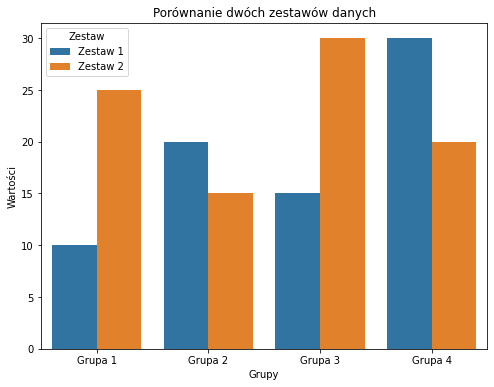

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Dane w formacie DataFrame
data = {
    'Grupa': ['Grupa 1', 'Grupa 2', 'Grupa 3', 'Grupa 4', 'Grupa 1', 'Grupa 2', 'Grupa 3', 'Grupa 4'],
    'Wartości': [10, 20, 15, 30, 25, 15, 30, 20],
    'Zestaw': ['Zestaw 1', 'Zestaw 1', 'Zestaw 1', 'Zestaw 1', 'Zestaw 2', 'Zestaw 2', 'Zestaw 2', 'Zestaw 2']
}

df = pd.DataFrame(data)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(8, 6))
sns.barplot(x='Grupa', y='Wartości', hue='Zestaw', data=df)

# Dodanie tytułów i etykiet
plt.title('Porównanie dwóch zestawów danych')
plt.xlabel('Grupy')
plt.ylabel('Wartości')

# Wyświetlenie wykresu
plt.show()


Jeśli mamy zestawy danych w osobnych słupkach, możemy użyć funkcji pd.melt:

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Dane w szerokim formacie
data = {
    'Grupa': ['Grupa 1', 'Grupa 2', 'Grupa 3', 'Grupa 4'],
    'Zestaw 1': [10, 20, 15, 30],
    'Zestaw 2': [25, 15, 30, 20]
}

df = pd.DataFrame(data)

In [7]:
df

,Grupa,Zestaw 1,Zestaw 2
0,Grupa 1,10,25
1,Grupa 2,20,15
2,Grupa 3,15,30
3,Grupa 4,30,20


In [10]:
df_long = pd.melt(df, id_vars='Grupa', value_vars=['Zestaw 1', 'Zestaw 2'], 
                  var_name='Zestaw', value_name='Wartości')
df_long

,Grupa,Zestaw,Wartości
0,Grupa 1,Zestaw 1,10
1,Grupa 2,Zestaw 1,20
2,Grupa 3,Zestaw 1,15
3,Grupa 4,Zestaw 1,30
4,Grupa 1,Zestaw 2,25
5,Grupa 2,Zestaw 2,15
6,Grupa 3,Zestaw 2,30
7,Grupa 4,Zestaw 2,20
